In [8]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.util import ngrams

# Path to cleaned chapters
input_dir = "../data/cleaned_chapters"

# Load all chapters into memory
chapters = {}
for filename in sorted(os.listdir(input_dir)):
    if filename.startswith("chapter_") and filename.endswith(".txt"):
        with open(os.path.join(input_dir, filename), "r", encoding="utf-8") as f:
            chapters[filename] = f.read().split()

In [9]:
# Example: top 20 words per chapter
for chapter_name, words in chapters.items():
    freq = Counter(words)
    print(f"\nTop words in {chapter_name}:")
    for word, count in freq.most_common(20):
        print(f"{word}: {count}")


Top words in chapter_10_nostopwords.txt:
gentlemen: 15
one: 11
two: 10
looked: 9
would: 7
went: 7
said: 7
like: 6
light: 6
wanted: 6
arms: 6
took: 6
gentleman: 6
top: 5
could: 5
hand: 5
street: 5
hands: 5
round: 5
want: 5

Top words in chapter_1_nostopwords.txt:
said: 119
room: 57
would: 56
miss: 47
bürstner: 47
could: 40
door: 34
like: 34
go: 34
supervisor: 34
see: 31
even: 31
way: 30
want: 29
know: 29
grubach: 26
asked: 25
looked: 24
time: 24
hand: 23

Top words in chapter_2_nostopwords.txt:
would: 40
said: 35
people: 26
even: 24
judge: 24
time: 23
one: 21
could: 20
man: 19
room: 16
hand: 15
thought: 15
like: 15
someone: 15
hall: 15
seemed: 14
arrest: 14
first: 13
looked: 13
way: 12

Top words in chapter_3_nostopwords.txt:
said: 96
woman: 53
would: 50
usher: 37
could: 34
even: 33
man: 33
way: 32
court: 29
go: 28
like: 27
student: 26
really: 26
asked: 25
judge: 25
hand: 22
people: 21
one: 21
see: 19
come: 18

Top words in chapter_4_nostopwords.txt:
miss: 49
room: 28
montag: 28
said: 

In [11]:
def get_ngrams(words, n=2, top_k=20):
    n_gram_list = list(ngrams(words, n))
    freq = Counter(n_gram_list)
    return freq.most_common(top_k)

for chapter_name, words in chapters.items():
    print(f"\nTop bigrams in {chapter_name}:")
    for ng, count in get_ngrams(words, 2):
        print(" ".join(ng), ":", count)
    
    print(f"\nTop trigrams in {chapter_name}:")
    for ng, count in get_ngrams(words, 3):
        print(" ".join(ng), ":", count)


Top bigrams in chapter_10_nostopwords.txt:
looked round : 4
two gentlemen : 4
one gentlemen : 3
two men : 2
top hats : 2
hats looked : 2
hand hand : 2
side street : 2
like someone : 2
single unit : 2
young woman : 2
anyone say : 2
round quarry : 2
knife passed : 2
end evening : 1
evening birthday : 1
birthday nine : 1
nine evening : 1
evening time : 1
time streets : 1

Top trigrams in chapter_10_nostopwords.txt:
top hats looked : 2
looked round quarry : 2
end evening birthday : 1
evening birthday nine : 1
birthday nine evening : 1
nine evening time : 1
evening time streets : 1
time streets quiet : 1
streets quiet two : 1
quiet two men : 1
two men came : 1
men came lived : 1
came lived frock : 1
lived frock coats : 1
frock coats pale : 1
coats pale fat : 1
pale fat wearing : 1
fat wearing top : 1
wearing top hats : 1
hats looked like : 1

Top bigrams in chapter_1_nostopwords.txt:
miss bürstner : 46
said miss : 14
said went : 7
next room : 6
said supervisor : 6
want see : 5
opened door 

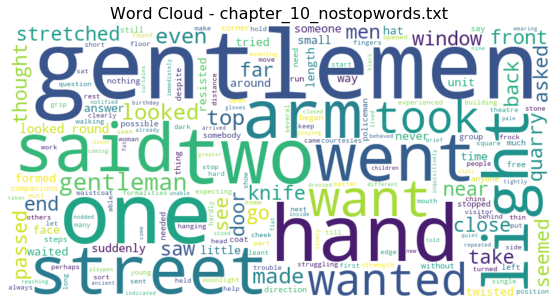

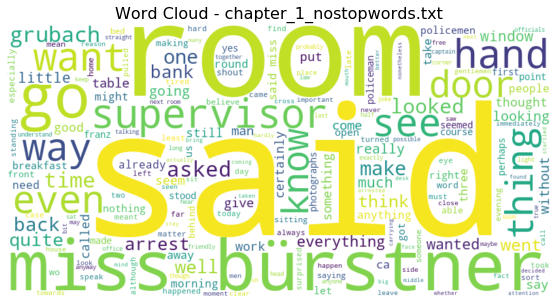

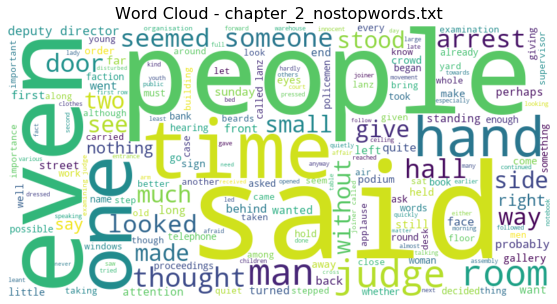

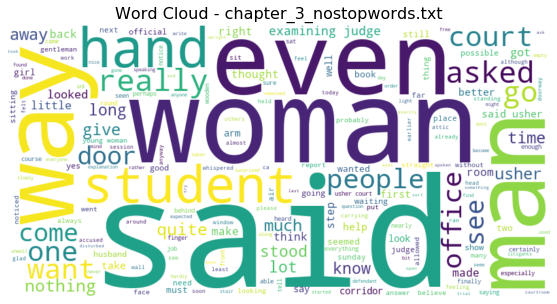

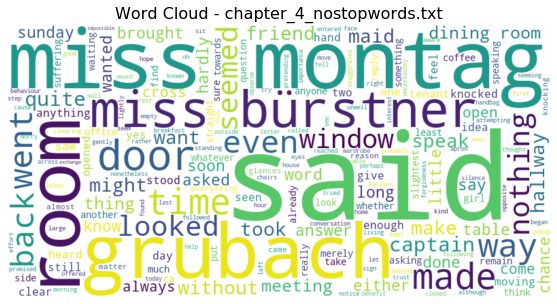

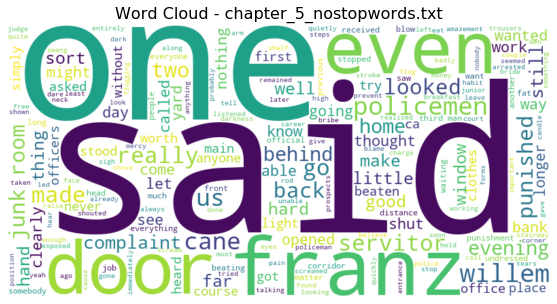

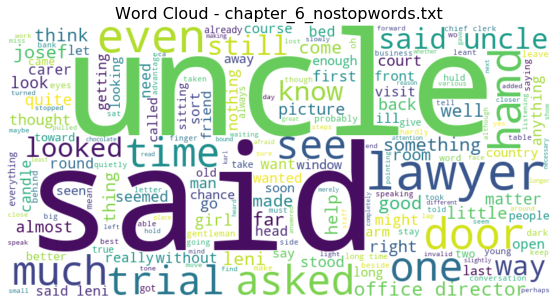

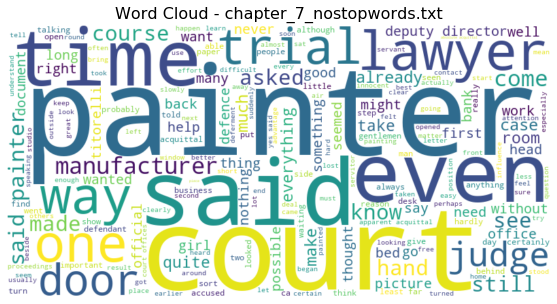

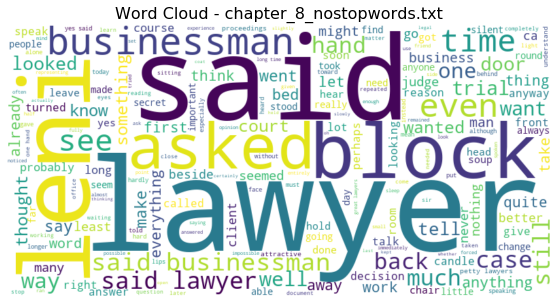

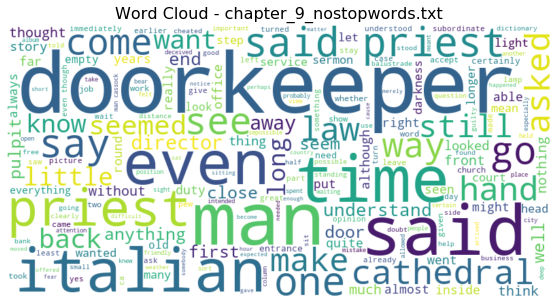

In [12]:
for chapter_name, words in chapters.items():
    text = " ".join(words)
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {chapter_name}", fontsize=16)
    plt.show()